# System of $n$ Bodies 

In [2]:
from system_Post_Newtonian import *

In [132]:
Sun = Particle(1.9891e30,name='Sun',color='#FFBD00')
Mercury = Particle(3.3011e23,[69816900e3,0,0],[0,47.362e3,0],name = 'Mercury',color = '#6C3417')
Venus = Particle(4.8675e24,[108939000e3,0,0],[0,35e3,0],name ='Venus',color ='#549581')
Earth = Particle(5.9722e24,np.array([1.4710e11,0,0]),np.array([0,3.0297e4,0]),name ='Earth',color ='#1BB46E')
Mars = Particle(6.4185e23,[249209300e3 ,0,0],np.array([0,24.077e3,0]),name ='Mars',color ='#BA3405')
Jupiter = Particle(1.8982e27,[740.52e9,0,0],[0,13.07e3,0],name = 'Jupiter',color = '#92A9B7')
Saturn = Particle(5.6834e26,[1352.55e9,0,0],[0,9.68e3,0],name = 'Saturn',color = '#B09F59')
Uranus = Particle(8.6810e25,[2.742e12,0,0],[0,6.80e3,0],name = 'Uranus',color = '#8ED8F3')
Neptune = Particle(1.02413e26,[4.46e12,0,0],[0,5.43e3,0],name = 'Neptune',color = '#257A99')

Bodies = [Sun,Mercury,Venus,Earth,Mars,Jupiter,Saturn,Neptune,Uranus]

In [133]:
SOLAR_SYSTEM = System()
for body in Bodies:
    SOLAR_SYSTEM.add_Particle(body)

In [138]:
import sys
h = 3600*24*4
years = 180
tf = years*365*24*3600
t = h
print(int(tf/h))
while t <= tf:
    sys.stdout.write(f'\r{np.round(t/tf*100,2)}/{100}%')
    sys.stdout.flush()
    r = SOLAR_SYSTEM.evolution_dt(h)
    SOLAR_SYSTEM.modify_R(r)
    t += h

10037
100.0/100%

Traceback (most recent call last):
  File "C:\Users\reasc\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\reasc\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


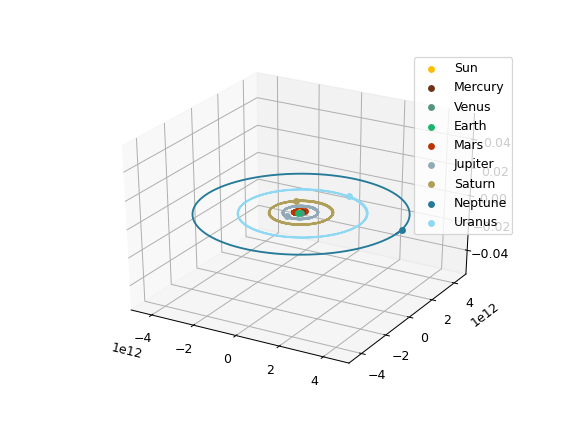

In [158]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')

import pandas as pd

N = -1
for i,body in enumerate(Bodies):
        r = body.get_positionArray()
        ax.plot3D(r[:N,0],r[:N,1],r[:N,2],color=body.get_Color())
        ax.scatter3D(r[N-1,0],r[N-1,1],r[N-1,2],color=body.get_Color(),label=body.get_Name())

plt.legend()

In [156]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

fps = 130
seconds = 30
N = len(Earth.get_positionArray())
seconds2= N//fps
frames = seconds*fps

factor = seconds2//seconds
print(N,seconds2,seconds,frames,factor)

cuerpos = []
names = []
colors = []
for j,body in enumerate(Bodies):
    r = body.get_positionArray()  
    aux = []
    for i in range(0,N,factor):
        aux.append(r[i])
    cuerpos.append(aux)
    names.append(body.get_Name())
    colors.append(body.get_Color())

cuerpos = np.array(cuerpos)


14691 113 30 3900 3
1058/3900

<IPython.core.display.Javascript object>


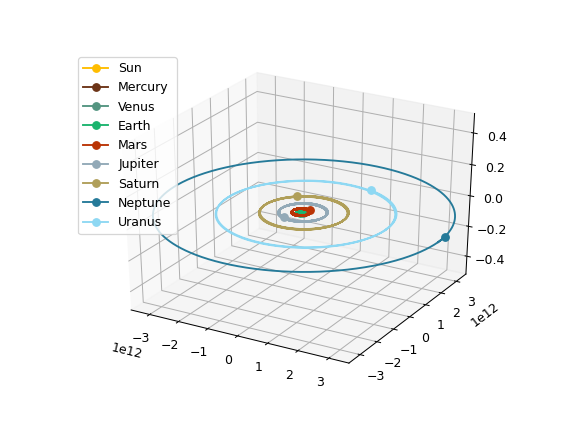

4897
4896/4897

In [157]:
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
lines = []
points = []
for i,cuerpo in enumerate(cuerpos):
    l, = ax.plot([],[],[],color=colors[i])
    p, = ax.plot([],[],[],color=colors[i],marker='o',label=names[i])
    lines.append(l)
    points.append(p)

m = 3.5e12
fac = 0.05
ax.set_ylim(-m*fac,m*fac)
ax.set_xlim(-m*fac,m*fac)
ax.set_zlim(-0.5,0.5)
ax.legend(loc='upper left')

def updatefig(frame):
    sys.stdout.write(f'\r{frame}/{frames}')
    sys.stdout.flush()

    for i,body in enumerate(cuerpos):
        lines[i].set_data(body[:frame,0],body[:frame,1])
        lines[i].set_3d_properties(body[:frame,2])
        points[i].set_data(body[frame,0],body[frame,1])
        points[i].set_3d_properties(body[frame,2])
    if frame/frames > fac:
        ax.set_ylim(-m*frame/frames,m*frame/frames)
        ax.set_xlim(-m*frame/frames,m*frame/frames)


    return lines,

frames = len(cuerpos[0])
intervalo = seconds/frames
print(frames)

anim = FuncAnimation(fig,updatefig,frames=frames,interval=intervalo*1e3)
HTML(anim.to_html5_video())